<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Lesson_6_ml_basic_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




In [46]:


# --- Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# --- Data Collection and Loading ---
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `fetch_california_housing()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

In [48]:
# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print(df.head())
print(df.shape)


# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4  

In [49]:
# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


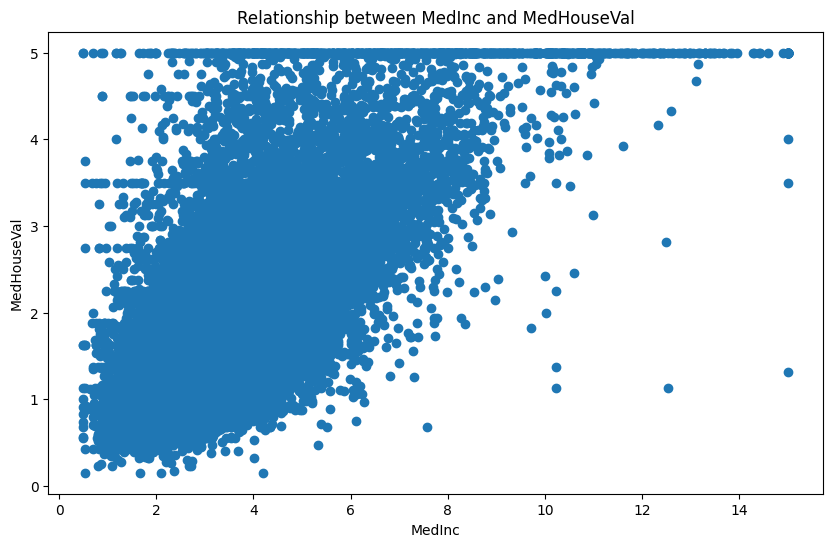

In [50]:
# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.

# Add your code here:
plt.figure(figsize=(10,6))
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Relationship between MedInc and MedHouseVal')
plt.show()


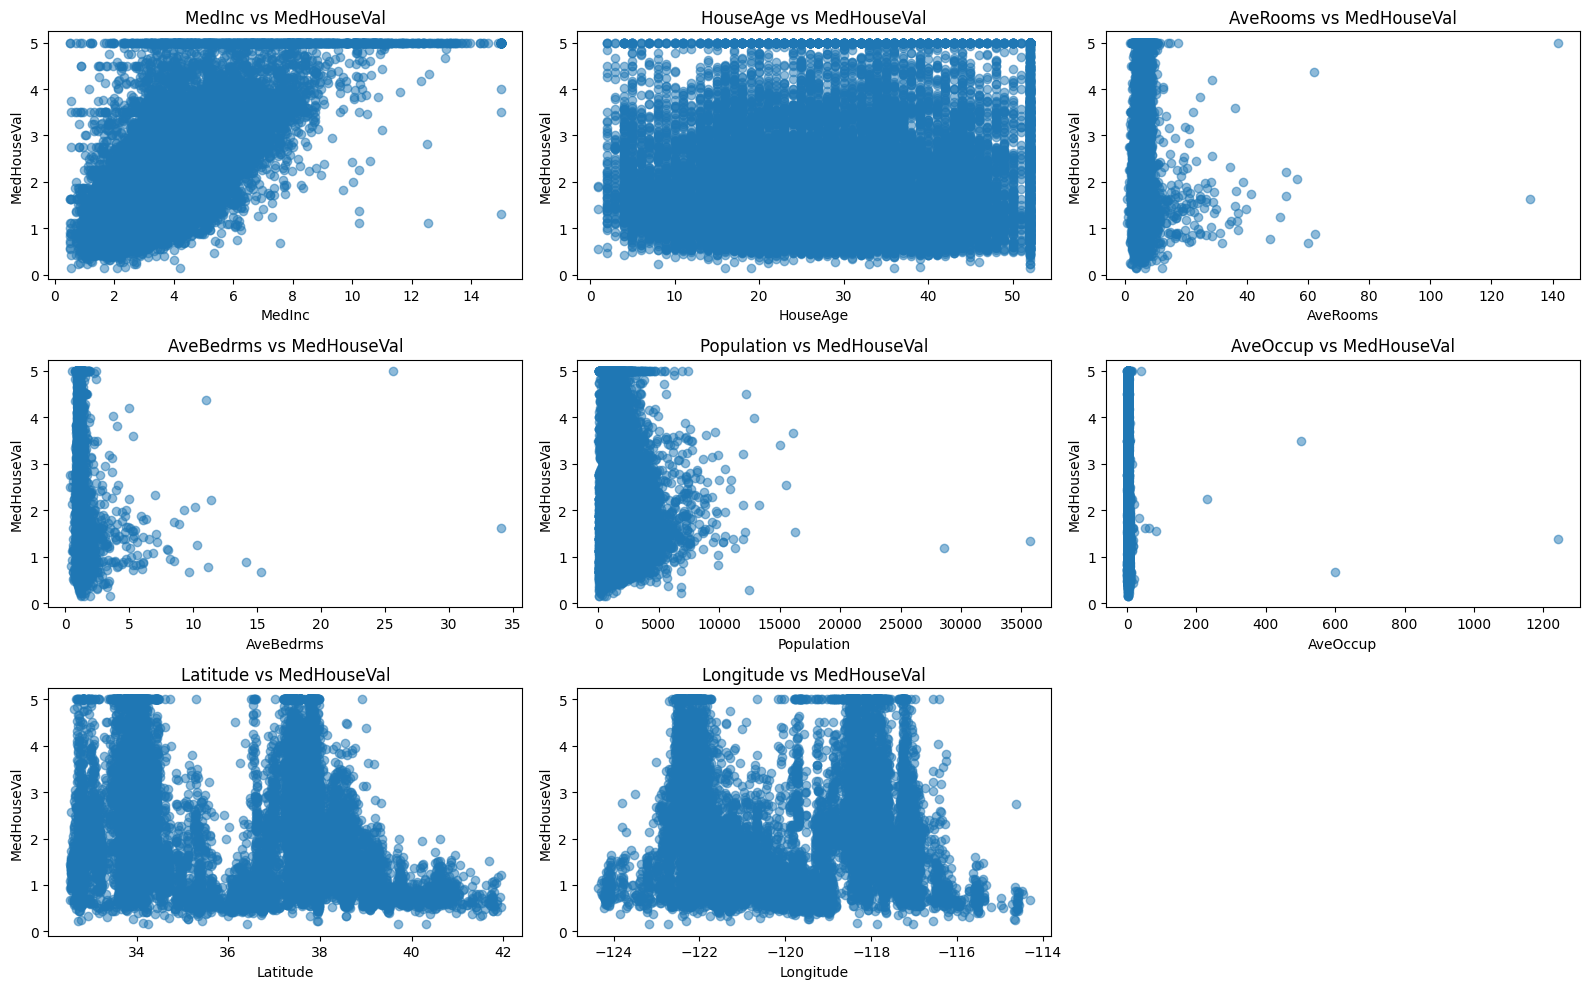

In [51]:
# --- Data Visualization ---
# TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
# --- Function to automate scatter plots ---

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['MedHouseVal'], alpha=0.5)
    plt.title(f"{feature} vs MedHouseVal")
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")

plt.tight_layout()
plt.show()


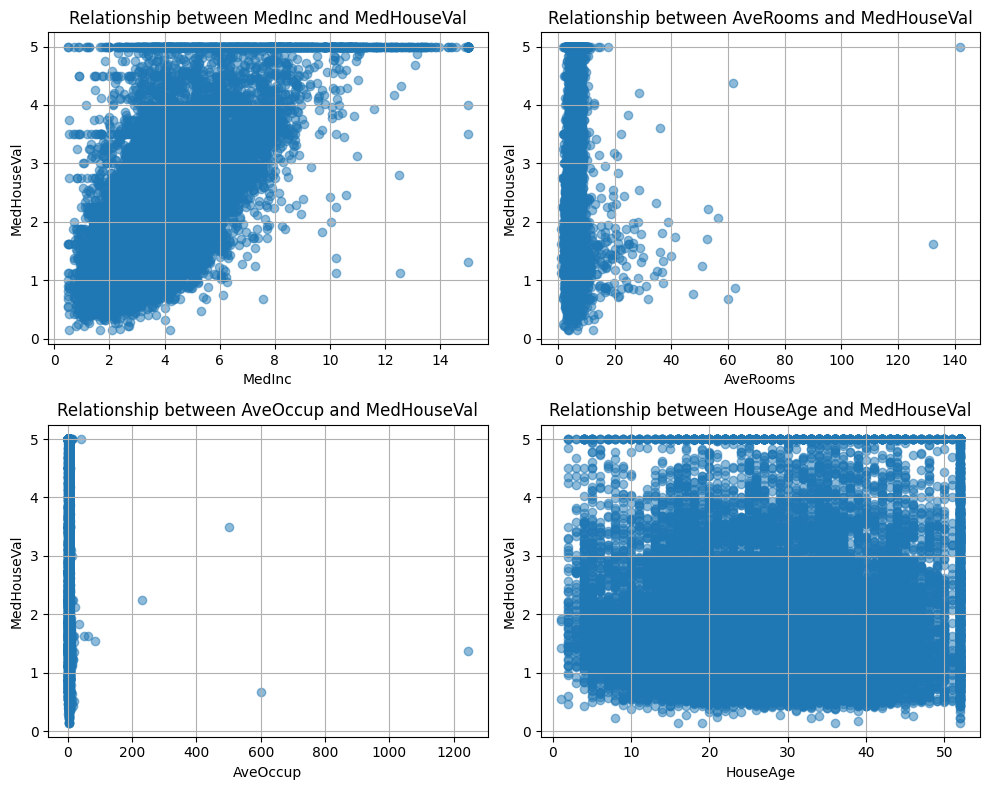

In [52]:
# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'

# Add your code here:
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
plt.figure(figsize=(10, 8))
for i , feature in enumerate(features,1):
  plt.subplot(2,2,i)
  plt.scatter(df[feature],df['MedHouseVal'],alpha=0.5)
  plt.title(f'Relationship between {feature} and MedHouseVal')
  plt.xlabel(feature)
  plt.ylabel('MedHouseVal')
  plt.grid(True)
plt.tight_layout()
plt.show()




In [53]:
# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [54]:
# TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

# Define your regression model here:
model = LinearRegression()


# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
model.fit(X_train, y_train)


# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.


# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R-squared (R2): 0.5757877060324508


In [55]:
# --- Model Prediction ---
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

# Add your prediction code here:
new_data = np.array([[3, 30, 6, 3, 34, -118, 1, 1500]])
predicted_value = model.predict(new_data)
print(f"Predicted Median House Value: {predicted_value[0]}")


Predicted Median House Value: -684.3418839463053


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
